# IRIS Data Classification Model and K Means Clustering

### Register no: RA1811031010015
### Name: Shamik Basu
### Class: CSE-IT 'K1'

In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
from sklearn.cluster import KMeans
import seaborn as sns
from numpy import arange
from matplotlib import pyplot as plt
from scipy.stats import norm
import pandas as pd
from matplotlib import rcParams
from sklearn import tree
from pandas.plotting import andrews_curves

from sklearn.model_selection import KFold 
from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


from sklearn.metrics import recall_score, precision_score, confusion_matrix

rcParams['figure.figsize'] = [18, 7]
rcParams['font.size'] = '18'
sns.set_style('darkgrid')

## Data Cleaning

In [2]:
file_name = '/home/shamik/Desktop/Shamik/SRM/ML_Sem_7/Assignment_4/IRIS.csv'

df = pd.read_csv(file_name, header=0)

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.memory_usage()

Index            128
sepal_length    1200
sepal_width     1200
petal_length    1200
petal_width     1200
species         1200
dtype: int64

In [6]:
df.memory_usage().sum()

6128

In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df.mean()

sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
dtype: float64

In [9]:
df.var()

sepal_length    0.685694
sepal_width     0.188004
petal_length    3.113179
petal_width     0.582414
dtype: float64

In [10]:
df.skew()

sepal_length    0.314911
sepal_width     0.334053
petal_length   -0.274464
petal_width    -0.104997
dtype: float64

In [11]:
df.kurtosis()

sepal_length   -0.552064
sepal_width     0.290781
petal_length   -1.401921
petal_width    -1.339754
dtype: float64

In [12]:
df.min()

sepal_length            4.3
sepal_width             2.0
petal_length            1.0
petal_width             0.1
species         Iris-setosa
dtype: object

In [13]:
df.max()

sepal_length               7.9
sepal_width                4.4
petal_length               6.9
petal_width                2.5
species         Iris-virginica
dtype: object

In [14]:
df.median()

sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
dtype: float64

In [15]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


## Data Exploration

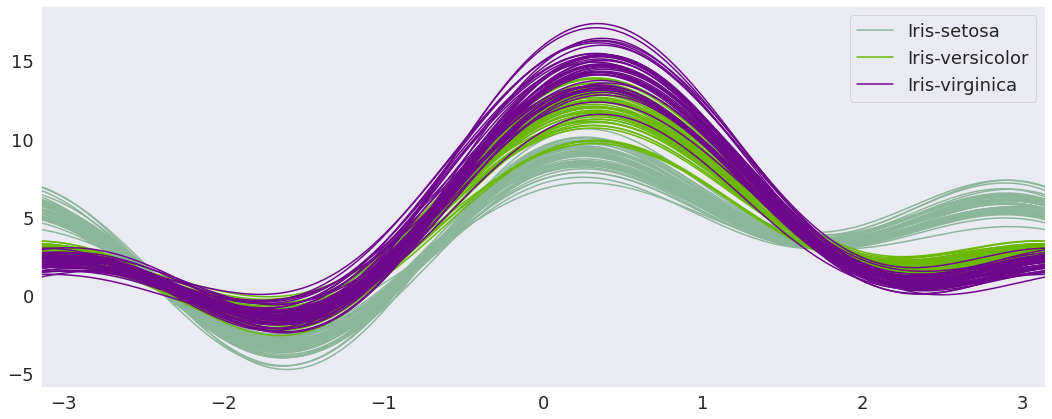

In [16]:
andrews_curves(df, "species")
plt.show()

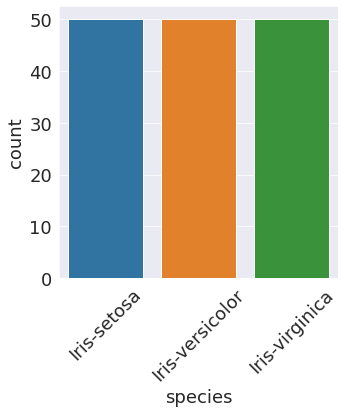

In [17]:
plt.figure(figsize=(5,5))
plt.xticks(rotation=45)
sns.countplot(x='species',data=df)
plt.show()

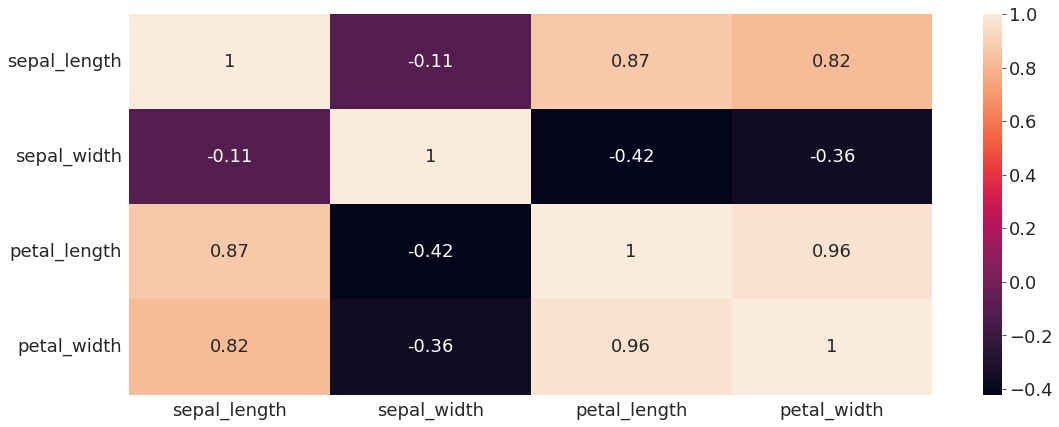

In [18]:
sns.heatmap(df.corr(), annot=True);

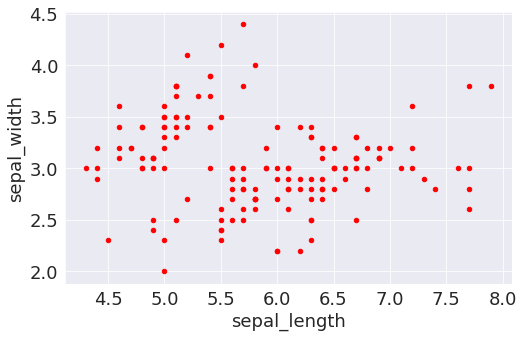

In [19]:
df.plot.scatter('sepal_length', 'sepal_width', figsize=(8, 5),color='red');

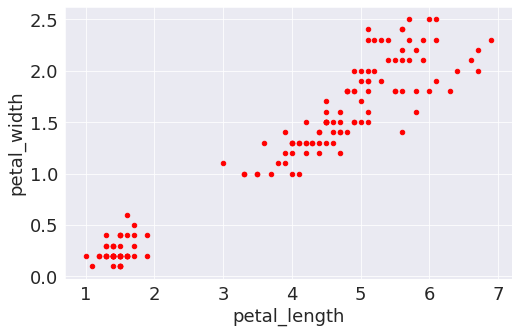

In [20]:
df.plot.scatter('petal_length', 'petal_width', figsize=(8, 5),color='red');

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


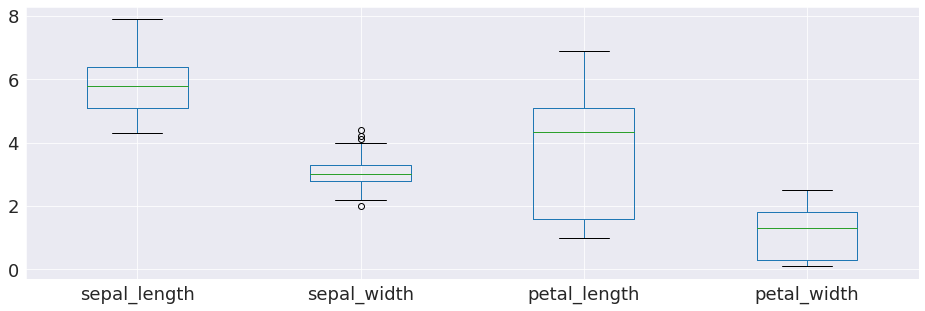

In [21]:
df.boxplot(figsize=(16, 5));
df

## Target Variable Selection

In [22]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

## Train Test Split

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=0)

## Data Split using K-Fold

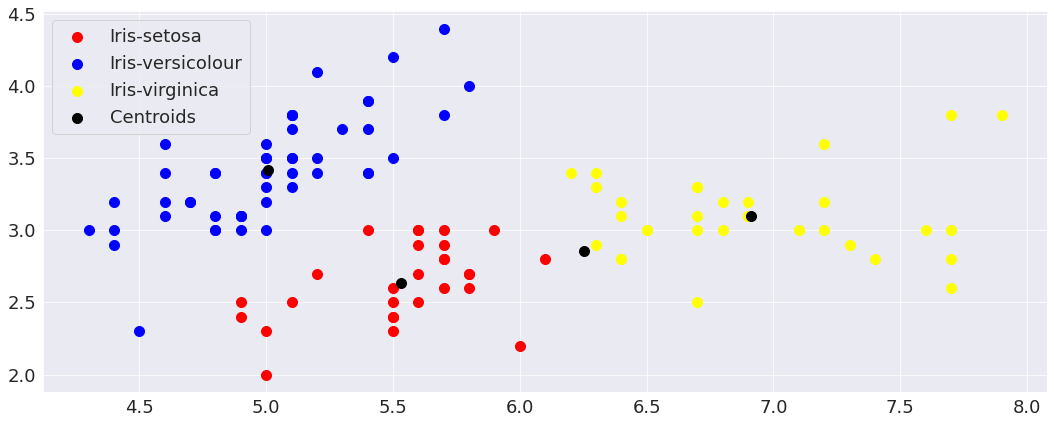

In [24]:
kmeans = KMeans(n_clusters=4,init = 'k-means++',   max_iter = 100, n_init = 10, random_state = 0) #Applying Kmeans classifier
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[y_kmeans   == 0, 0], X[y_kmeans == 0, 1],s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans   == 1, 0], X[y_kmeans == 1, 1],s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans   == 2, 0], X[y_kmeans == 2, 1],s = 100, c = 'yellow', label = 'Iris-virginica')   #Visualising the clusters - On the first two columns
plt.scatter(kmeans.cluster_centers_[:,   0], kmeans.cluster_centers_[:,1],s = 100, c = 'black', label = 'Centroids')   #plotting the centroids of the clusters
plt.legend()
plt.show()

## Model Selection

In [25]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [26]:
#Linear SVM Classifier

sv = SVC(kernel="linear", C=0.025)

sv.fit(X_train, y_train)
print("Train Score: ", sv.score(X_train, y_train)*100 , "%")
print("Test Score: ", sv.score(X_test, y_test)*100, "%")

Train Score:  96.0 %
Test Score:  96.0 %


In [27]:
# K Neighbours Classifier

kn = KNeighborsClassifier(3)

kn.fit(X_train, y_train)
print("Train Score: ", kn.score(X_train, y_train)*100 , "%")
print("Test Score: ", kn.score(X_test, y_test)*100, "%")

Train Score:  97.0 %
Test Score:  96.0 %


In [28]:
#Random Forest Classifier

rf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)

rf.fit(X_train, y_train)
print("Train Score: ", rf.score(X_train, y_train)*100 , "%")
print("Test Score: ", rf.score(X_test, y_test)*100, "%")

Train Score:  99.0 %
Test Score:  94.0 %


In [29]:
# Naive Bayes Classifier

nb = GaussianNB()

nb.fit(X_train, y_train)
print("Train Score: ", nb.score(X_train, y_train)*100 , "%")
print("Test Score: ", nb.score(X_test, y_test)*100, "%")

Train Score:  96.0 %
Test Score:  96.0 %


In [30]:
#Decision Tree Classifier

dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)
print("Train Score: ", dt.score(X_train, y_train)*100 , "%")
print("Test Score: ", dt.score(X_test, y_test)*100, "%")

Train Score:  100.0 %
Test Score:  98.0 %


In [31]:
#Random Forest Classifier

dt = RandomForestClassifier()

dt.fit(X_train, y_train)
print("Train Score: ", dt.score(X_train, y_train)*100 , "%")
print("Test Score: ", dt.score(X_test, y_test)*100, "%")

Train Score:  100.0 %
Test Score:  96.0 %


## Model Evaluation

In [32]:
# Decision Tree is selected for better perfoemance and evaluation for the same is conducted.

y_pred = dt.predict(X_test)

print("Recall score:", recall_score(y_test, y_pred, average='macro'))
print("Precision score:", precision_score(y_test, y_pred, average='macro'))
print ("Confusio Matrix:\n", confusion_matrix(y_test, y_pred))

Recall score: 0.9602339181286549
Precision score: 0.9602339181286549
Confusio Matrix:
 [[16  0  0]
 [ 0 18  1]
 [ 0  1 14]]


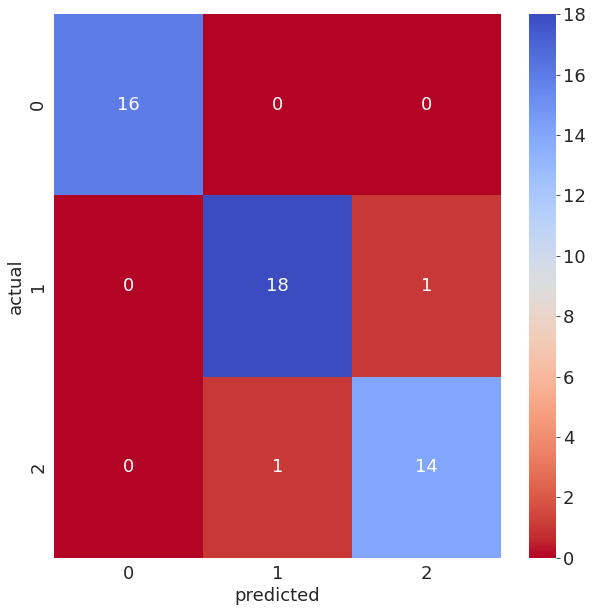

In [33]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='coolwarm_r')
plt.xlabel('predicted')
plt.ylabel('actual');

# Model has been developed with 96% accuracy using Decision Tree Classifier 